In [16]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from prophet import Prophet


import warnings
warnings.filterwarnings('ignore')

In [17]:
# Loading data
data = pd.read_csv('Wide-World-Importers-Time-Series - time-series.csv')

In [18]:
# Checking data types and info
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order Date   1069 non-null   object
 1   Total Sales  1069 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.8+ KB


Order Date     object
Total Sales     int64
dtype: object

In [19]:
data

,Order Date,Total Sales
0,2015-01-01,185750
1,2015-01-02,153874
2,2015-01-03,197511
3,2015-01-04,148053
4,2015-01-05,129639
...,...,...
1064,2018-05-26,342440
1065,2018-05-27,285897
1066,2018-05-28,122899
1067,2018-05-30,213954


In [20]:
# Pre-processing
data['Order Date']=pd.to_datetime(data['Order Date'], format='%Y-%m-%d')
data.set_index(['Order Date'], inplace=True)

In [21]:
data.dtypes

Total Sales    int64
dtype: object

In [22]:
# Filling in nulls
data.fillna(method='pad', inplace=True)


In [23]:
# Resampling to fill in missing dates, M is turning it into months.
data = data.resample("M").sum()

In [24]:
data

,Total Sales
Order Date,
2015-01-31,5712967
2015-02-28,4179110
2015-03-31,5876868
2015-04-30,6154185
2015-05-31,6709101
2015-06-30,6136984
2015-07-31,6648934
2015-08-31,5268538
2015-09-30,5725387


In [40]:
#Saving the above dataframe as a csv to add into the main Spreadsheet (to use for the Naiive Approach and Linear Regression)
data.to_csv('Monthly-sales.csv')


In [25]:
# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

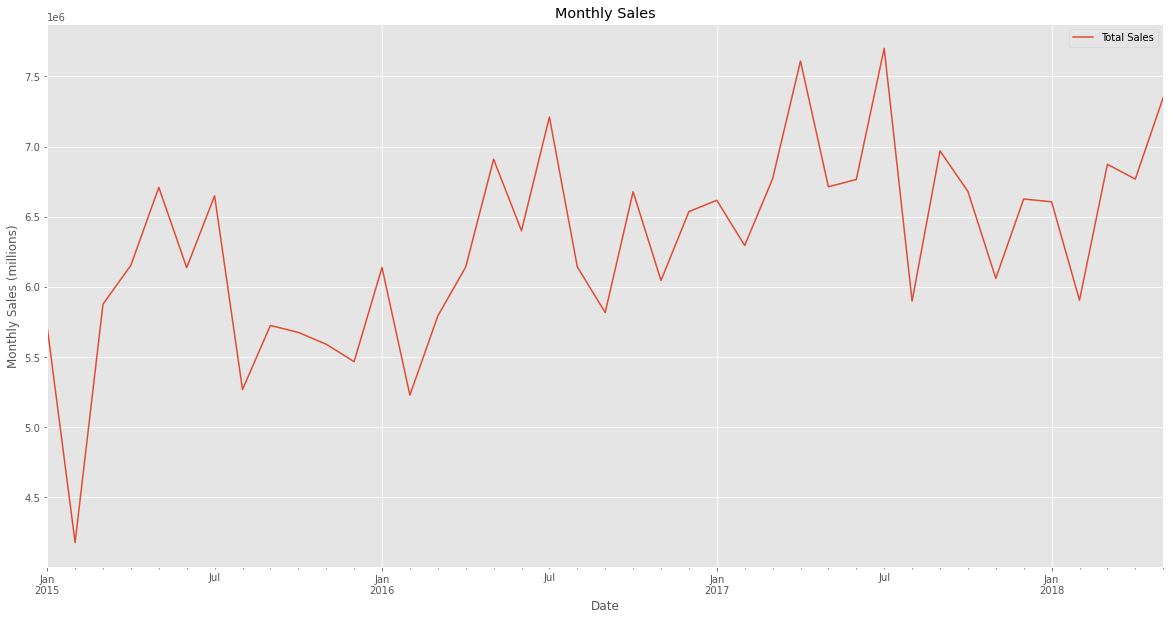

In [26]:
# Plot data
data.plot()
plt.title('Monthly Sales')
plt.ylabel('Monthly Sales (millions)')
plt.xlabel('Date')
plt.show()

<Figure size 1440x720 with 0 Axes>

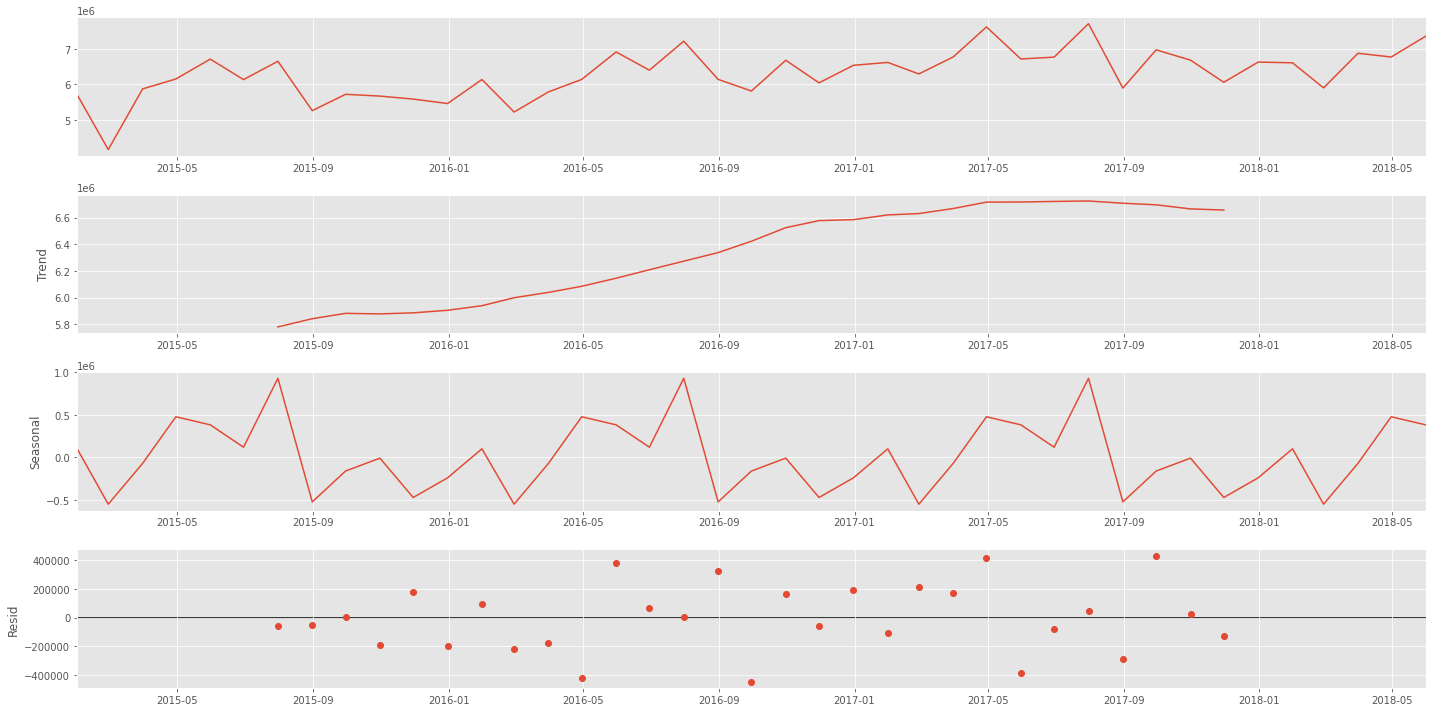

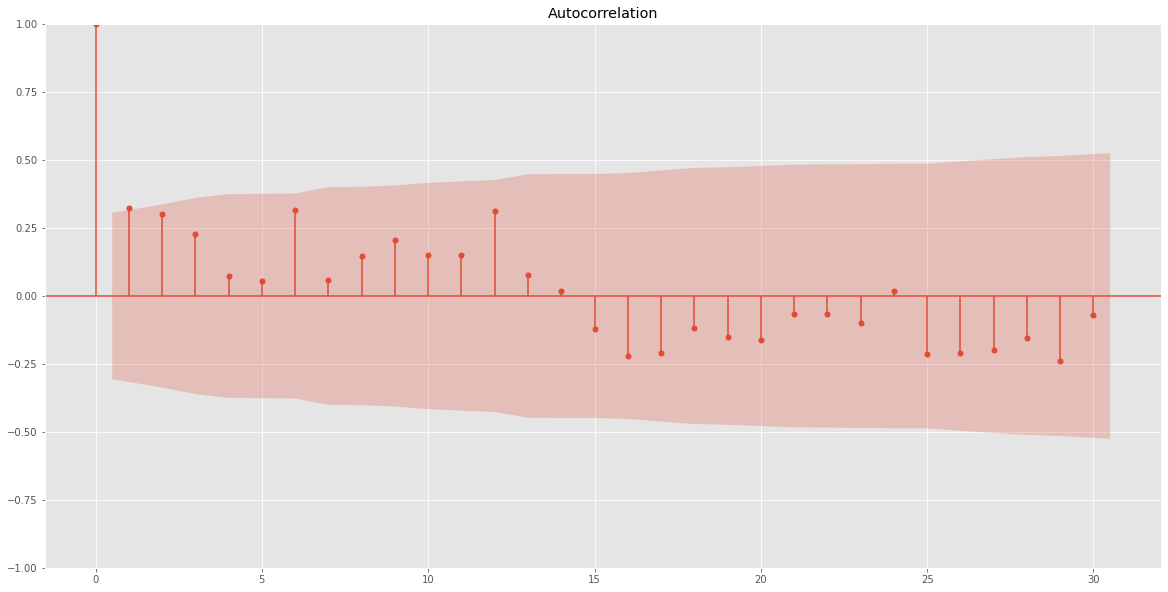

In [27]:
# Decomposing and plotting the ACF to check for trend, seasonality and see if the data is stationary

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)
fig = plt.figure()
fig = decomposition.plot()

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Total Sales'], lags=30);

SARIMA

In [28]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Grid Search / Hyperparameter Optimization for Model selection - (be able to pick up the smallest AIC Value).
# Generate all different combinations of seasonal p, q and q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# SARIMAX returns the AIC Value
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
data

,Total Sales
Order Date,
2015-01-31,5712967
2015-02-28,4179110
2015-03-31,5876868
2015-04-30,6154185
2015-05-31,6709101
2015-06-30,6136984
2015-07-31,6648934
2015-08-31,5268538
2015-09-30,5725387


In [30]:
# Train the data and predict the last 3 years
training_data = data['2015-01-31':'2017-04-30']
test_data = data['2017-05-31':'2018-05-31']


In [31]:
# Generate an AIC Value
AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(training_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue
results

In [32]:
mod = sm.tsa.statespace.SARIMAX(training_data,
                                order=param,
                                seasonal_order=param_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
AIC.append(results.aic)
SARIMAX_model.append([param, param_seasonal])

In [33]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))


The smallest AIC is 6.0 for model SARIMAX(0, 0, 0)x(2, 1, 0, 12)


In [34]:
# Fit the model
mod = sm.tsa.statespace.SARIMAX(training_data,
                                order=SARIMAX_model[AIC.index(min(AIC))][0],
                                seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                                enforce_stationarity=False,
                                enforce_invertibility=False) #pdq order kept the same

results = mod.fit()

In [35]:
# Sample prediction with 1-step ahead forecasting of the last year 2017  
# Model is asked to predict data using existing data 

#pred1 = results.get_prediction(start='2019-05-31')
#pred1_ci = pred1.conf_int()

In [53]:
# True forecasting 
# Model is asked to predict data its not seen before 

pred2 = results.get_forecast('2019-12-31')
pred2_ci = pred2.conf_int()
print(pred2.predicted_mean['2018-06-01':'2020-01-01'])

2018-06-30    6399739.0
2018-07-31    7210185.0
2018-08-31    6142918.0
2018-09-30    5817312.0
2018-10-31    6677888.0
2018-11-30    6045603.0
2018-12-31    6536223.0
2019-01-31    6617169.0
2019-02-28    6294784.0
2019-03-31    6769654.0
2019-04-30    7608887.0
2019-05-31    6909163.0
2019-06-30    6399739.0
2019-07-31    7210185.0
2019-08-31    6142918.0
2019-09-30    5817312.0
2019-10-31    6677888.0
2019-11-30    6045603.0
2019-12-31    6536223.0
Freq: M, Name: predicted_mean, dtype: float64


In [49]:
pred2_rmse = results.predict(start='2017-05-31', end= '2018-05-31')

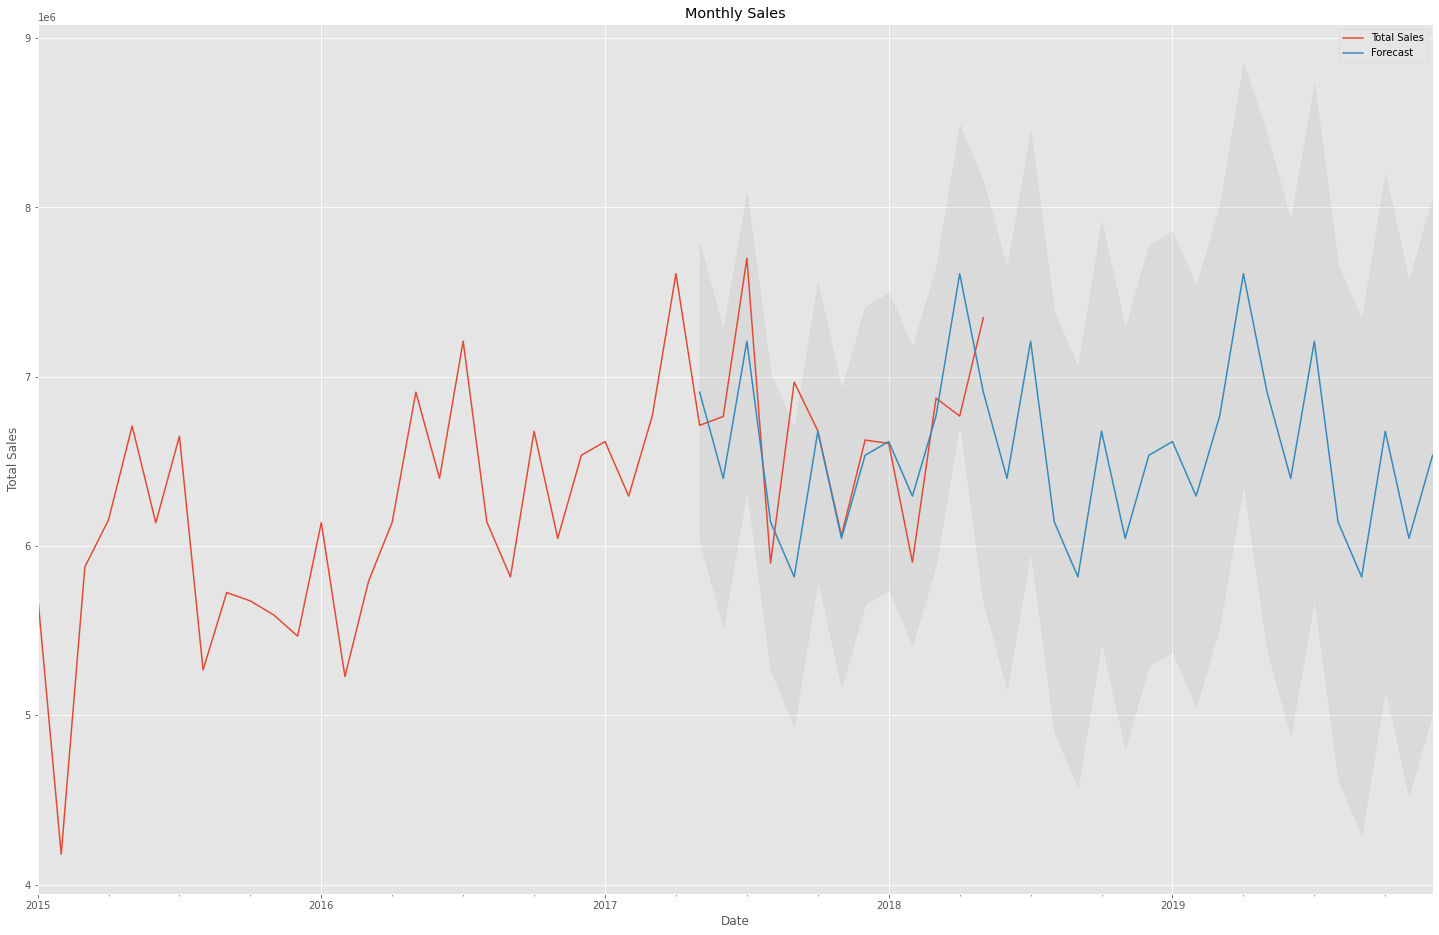

In [52]:
# Plot all data

ax = data.plot(figsize=(25, 16))
#pred1.predicted_mean.plot(ax=ax, label='1-step-ahead Forecast')
pred2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred2_ci.index, pred2_ci.iloc[:, 0], pred2_ci.iloc[:, 1], color='grey', alpha=.1)
plt.title('Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

In [51]:
# RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt


rms_sarima = sqrt(mean_squared_error(test_data, pred2_rmse))
print(rms_sarima)

469714.0083693317
